In [59]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use('ggplot')

import seaborn as sns

import cartopy.crs as ccrs
import cartopy.feature as cfeat
import cartopy.io.img_tiles as cimgt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import AISMapPlot as aismap
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


In [77]:
ais_learners = []
sectors = [0, 1, 2, 3, 4, 5]
sector_borders = [52.8, 4.8, 6.0, 7.2, 8.6, 9.81]
positions = pd.DataFrame([[52.8, np.nan], [np.nan, 4.8], [np.nan, 6.0], [np.nan, 7.2], [np.nan, 8.6], [np.nan, 9.81]],
                         columns = ['Latitude', 'Longitude'])
for s in sectors:
    ais_learners.append(pd.read_pickle('ROT-HAM_learners_01min_s%d.pkl' % (s)))

In [80]:
complete = ais_learners[0]
complete = complete.append(ais_learners[1])
complete = complete.append(ais_learners[2])
complete = complete.append(ais_learners[3])
complete = complete.append(ais_learners[4])
complete = complete.append(ais_learners[5])

In [81]:
X = complete[['Latitude', 'Longitude', 'COG', 'SOG']]
y = complete['remainingMins']

In [82]:

cv_splits = list(GroupKFold(n_splits = 10).split(X, y, groups = complete['TripID']))


In [83]:
# Create a train-test split
train_indices, test_indicies = cv_splits[0]
X_train, X_test = X.iloc[train_indices], X.iloc[test_indicies]
y_train, y_test = y.iloc[train_indices], y.iloc[test_indicies]

In [43]:
knn = KNeighborsRegressor()

knn_params = dict(n_neighbors = range(5, 40), weights = [ 'distance'])
knn_rand = RandomizedSearchCV(knn, knn_params, cv = cv_splits, return_train_score = True, scoring = 'neg_mean_absolute_error', n_iter = 5)
knn_rand.fit(X, y)

pd.DataFrame(knn_rand.cv_results_).transpose()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_n_neighbors,param_weights,params,rank_test_score,split0_test_score,split0_train_score,...,split7_test_score,split7_train_score,split8_test_score,split8_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,1.163304,1.647841,-72.287800,-2.391854,39,distance,"{'weights': 'distance', 'n_neighbors': 39}",1,-60.941819,-2.390267,...,-75.212946,-2.347590,-73.537592,-2.329486,-80.770142,-2.417437,0.065557,0.073538,6.907903,0.032123
1,1.146980,0.873542,-74.959240,-2.391508,11,distance,"{'weights': 'distance', 'n_neighbors': 11}",5,-64.335905,-2.390026,...,-77.985783,-2.348876,-75.651050,-2.329653,-82.612260,-2.416953,0.100721,0.052451,6.690329,0.031559
2,1.311952,1.067084,-74.066129,-2.391790,15,distance,"{'weights': 'distance', 'n_neighbors': 15}",4,-63.180632,-2.389372,...,-77.099167,-2.348300,-74.868814,-2.329545,-81.889433,-2.417991,0.212970,0.131676,6.747037,0.031955
3,1.300791,1.448150,-72.757759,-2.391858,28,distance,"{'weights': 'distance', 'n_neighbors': 28}",2,-61.584593,-2.390267,...,-75.670742,-2.347596,-73.856720,-2.329492,-81.001710,-2.417446,0.141341,0.098232,6.837361,0.032124
4,1.305306,1.343769,-73.274931,-2.391859,21,distance,"{'weights': 'distance', 'n_neighbors': 21}",3,-62.219756,-2.390206,...,-76.224064,-2.347644,-74.171638,-2.329515,-81.304064,-2.417437,0.177278,0.200012,6.797788,0.032108


In [44]:
pd.DataFrame(knn_rand.cv_results_).transpose()

,0,1,2,3,4
mean_fit_time,1.1633,1.14698,1.31195,1.30079,1.30531
mean_score_time,1.64784,0.873542,1.06708,1.44815,1.34377
mean_test_score,-72.2878,-74.9592,-74.0661,-72.7578,-73.2749
mean_train_score,-2.39185,-2.39151,-2.39179,-2.39186,-2.39186
param_n_neighbors,39,11,15,28,21
param_weights,distance,distance,distance,distance,distance
params,"{'weights': 'distance', 'n_neighbors': 39}","{'weights': 'distance', 'n_neighbors': 11}","{'weights': 'distance', 'n_neighbors': 15}","{'weights': 'distance', 'n_neighbors': 28}","{'weights': 'distance', 'n_neighbors': 21}"
rank_test_score,1,5,4,2,3
split0_test_score,-60.9418,-64.3359,-63.1806,-61.5846,-62.2198
split0_train_score,-2.39027,-2.39003,-2.38937,-2.39027,-2.39021


In [84]:
knn_best = KNeighborsRegressor(n_neighbors = 41, weights = 'distance')
knn_best.fit(X_train, y_train)

knn_predicts = knn_best.predict(X_test)

In [85]:
knn_predicts_diffs = knn_predicts - y_test

In [87]:
knn_predicts_frame = pd.DataFrame({'correct': y_test, 'knn_predicted': knn_predicts, 'diff': knn_predicts_diffs})
knn_predicts_frame['abs_error'] = knn_predicts_frame['diff'].transform(lambda x: abs(x))
knn_predicts_frame = knn_predicts_frame.sort_values('correct')
knn_predicts_frame['abs_error'].describe()

count    81066.000000
mean        60.872590
std         82.649257
min          0.000000
25%          7.401204
50%         30.363544
75%         81.123093
max       1114.960300
Name: abs_error, dtype: float64

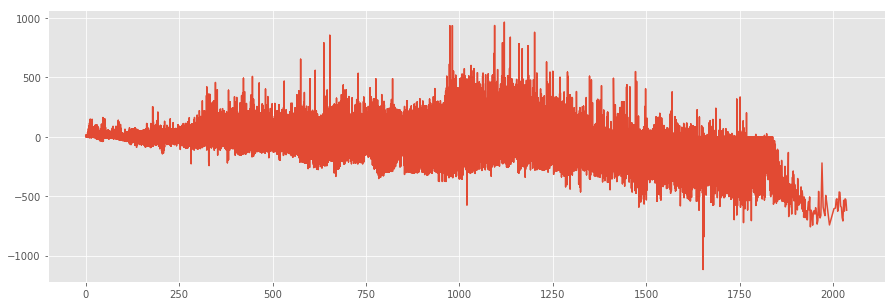

In [88]:
plt.figure(figsize = (15, 5))
plt.plot(knn_predicts_frame['correct'], knn_predicts_frame['diff'])

In [ ]:
rfo = RandomForestRegressor()
rfo_params = dict(n_estimators = range(1, 10), max_depth = range(5,15))
rfo_rand = RandomizedSearchCV(rfo, rfo_params, cv = cv_splits, return_train_score = True, scoring = 'neg_mean_absolute_error', n_iter = 10)
rfo_rand.fit(X, y)

pd.DataFrame(rfo_rand.cv_results_)